# 산점도
- 변수간 관계 포착을 직관적으로 전달

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D

In [2]:
landtemps = pd.read_csv('data/landtemps2019avgs.csv')

### 평균 기온별 위도(latabs)의 산점도

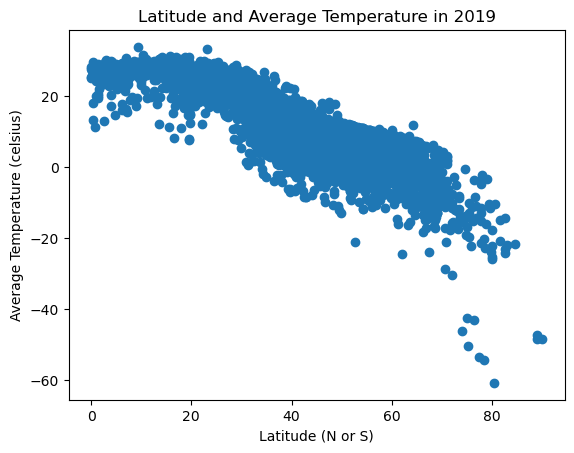

In [3]:
plt.scatter(x='latabs', y='avgtemp', data=landtemps)
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (celsius)')
plt.title('Latitude and Average Temperature in 2019')
plt.show()

### 고지대를 빨간색으로 표시

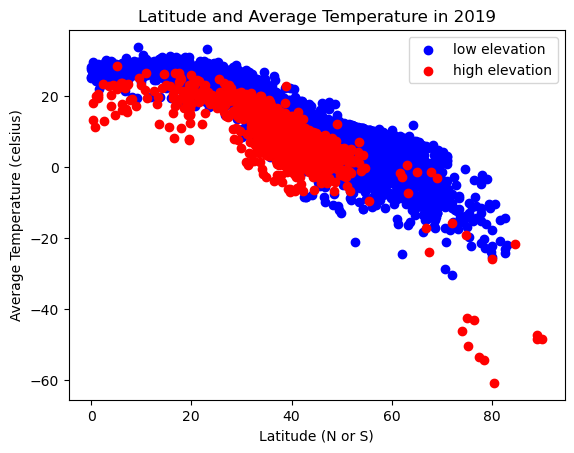

In [4]:
low, high = landtemps.loc[landtemps.elevation <=1000], landtemps.loc[landtemps.elevation >1000]
plt.scatter(x='latabs', y='avgtemp', c='blue', data=low)
plt.scatter(x='latabs', y='avgtemp', c='red', data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (celsius)')
plt.title('Latitude and Average Temperature in 2019')
plt.show()

### 고도, 위도, 기온의 3차원 산점도(**Axes3D 모듈)
- 고도가 높은 관측소의 위도가 증가함에 따라 온도가 가파르게 감소하는 것으로 보임
> 1. Axes3D 모듈 임포트
  2. plt.axes(projection='3d')로 3차원에 투영
  3. ax.scatter3D 메서드로 서브플롯 사용

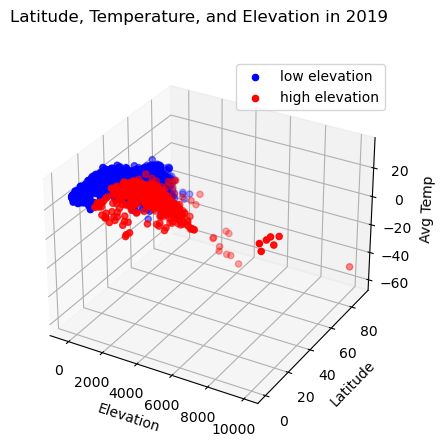

In [16]:
fig = plt.figure()
plt.suptitle('Latitude, Temperature, and Elevation in 2019')

ax = plt.axes(projection='3d')
# ax.set_title('Three D')

# 축의 레이블 어트리뷰트를 다룰 때는 xlabels가 아닌 set_xlabels
ax.set_xlabel('Elevation')
ax.set_ylabel('Latitude')
ax.set_zlabel('Avg Temp')
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label='low elevation', c='blue')
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label='high elevation', c='red')
ax.legend()
plt.show()

### 위도와 기온 데이터의 회귀직선
- regplot으로 회귀직선 그림

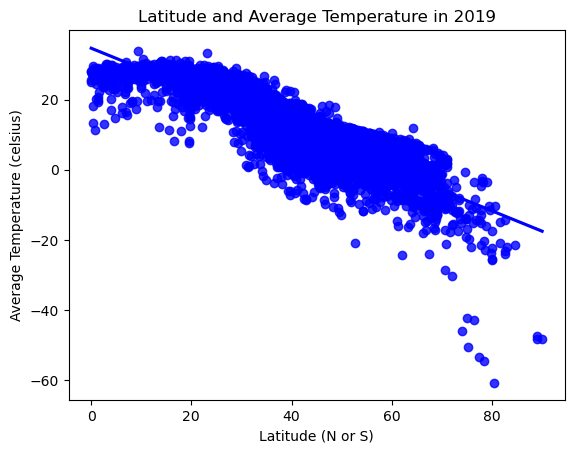

In [6]:
sns.regplot(x='latabs', y='avgtemp', color='blue', data=landtemps)
plt.title('Latitude and Average Temperature in 2019')
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (celsius)')
plt.show()

### 저지대 및 고지대에 위치한 관측소의 회귀직선을 따로 그리기
- lmplot 사용 : regplot 메서드와 기능은 비슷
    - hue 어트리뷰트가 있어, 고도별 회귀직선을 그릴 수 있음

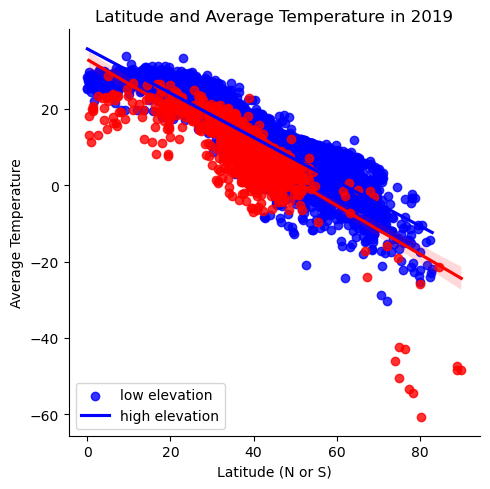

In [9]:
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000, 'low', 'high')
sns.lmplot(x='latabs', y='avgtemp', hue='elevation_group', palette=dict(low="blue", high="red"),
          legend_out=False, data=landtemps)
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature')
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title('Latitude and Average Temperature in 2019')
plt.tight_layout()
plt.show()

### 저지대 및 고지대 회귀직선보다 위에 있는 관측소 나타내기

In [10]:
high.loc[(high.latabs>38)&(high.avgtemp>=18), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
3943,LAJES_AB,Portugal,38.7303,1016.2,18.041667
5805,WILD_HORSE_6N,United States,38.9031,1438.7,22.770000


In [13]:
low.loc[(low.latabs>47)&(low.avgtemp>=14), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
1048,SAANICHTON_CDA,Canada,48.6167,61.0,17.820000
1146,CLOVERDALE_EAST,Canada,49.1167,50.0,14.751667
6830,WINNIBIGOSHISH_DAM,United States,47.4306,400.8,18.370000
7125,WINIFRED,United States,47.5589,988.5,16.310000


### 저지대와 고지대 회귀직선보다 아래에 있는 관측소를 나타내기

In [14]:
high.loc[(high.latabs<5)&(high.avgtemp<18), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
2250,BOGOTA_ELDORADO,Colombia,4.701,2548.0,14.766667
2272,SAN_LUIS,Colombia,0.862,2976.4,11.320833
2303,IZOBAMBA,Ecuador,0.350,3058.0,13.220000
2306,CANAR,Ecuador,2.550,3083.0,13.036364
2307,LOJA_LA_ARGELIA,Ecuador,4.033,2160.0,17.140909


In [15]:
low.loc[(low.latabs<50)&(low.avgtemp<-9), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
1189,FT_STEELE_DANDY_CRK,Canada,49.5167,856.0,-12.190000
1547,BALDUR,Canada,49.2833,450.0,-10.856000
1833,POINTE_CLAVEAU,Canada,48.2667,4.0,-10.620000
1862,CHUTE_DES_PASSES,Canada,49.8333,398.0,-12.802500
6544,PRESQUE_ISLE,United States,46.6539,182.6,-9.696667


- 👉 이처럼 산점도는 두 변수의 관계를 잘 나타내며, 데이터의 부분집합 내에서 관계를 시각화하는 과정도 알아봤다.